# Practice Session 02: Management of networks data

In this session we will study an application of complex networks analysis to cooking. We will start with the *flavors network*, a bi-partite network connecting culinary ingredients to flavour compounds [*].

The initial dataset, prepared by [Ling Cheng in 2016](https://github.com/lingcheng99/Flavor-Network), contains three files:

* `ingredients.tsv` -- information about culinary ingredients
* `compounds.tsv` -- information about flavour compounds
* `ingredient-compound.tsv` -- flavour compounds present in each culinary ingredient

[*] Ahn, Y. Y., Ahnert, S. E., Bagrow, J. P., & Barabasi, A. L. (2011). [Flavor network and the principles of food pairing](https://doi.org/10.1038/srep00196). Scientific reports, 1(1), 1-7.

You can find this dataset in the data folder form this same github repository.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Your name here</font>

E-mail: <font color="blue">Your e-mail here</font>

Date: <font color="blue">The current date here</font>

# 0. Use a Cytoscape App (ClusterMaker2)

Cytoscape has "apps" that can be installed and used.

## 0.1. Install ClusterMaker2

Install ClusterMaker2 (``Apps > App Store``). You may be able to install it directly from a browser, or you may need to download a jar file from the [releases](https://apps.cytoscape.org/apps/clustermaker2) directory of clustermaker2, and then ``Apps > App Store > Install apps from file ...`` in the App Manager.

## 0.2. Use ClusterMaker2 to Karate Club

Use ClusterMaker2 on the Karate Club file karate.gml.

* Run the network analyzer first, so you can have "Edge betweenness" as an attribute in edges

* Apply the cluster algorithms in the `ClusterMaker2` plug-in.

   * You can find a description of the algorithms used in the [ClusterMaker2 homepage](http://www.rbvi.ucsf.edu/cytoscape/clusterMaker2/)
   
   * Start by running the affinity [affinity propagation](https://en.wikipedia.org/wiki/Affinity_propagation) clustering algorithm in ClusterMaker2 (Apps > ClusterMaker cluster network > Affinity Propagation Cluster ...) and seeing if that works.
      * Once you run it, the network will have a new attribute in the nodes (in the node table you will see an attribute named ``_APCluster``)
      * Use the new attribute in the nodes for "Fill color" using a "Discrete mapping" on ``_APCluster.`` Note that with the right button you can generate a mapping out of a set of pre-defined ones.
      * Save and upload the image.
      * Repeat the same process using Fast Greedy.

Save both images in the same folder as this notebook as 'karate_AP.png' and 'karate_greedy.png'

![Karate Club](https://www.researchgate.net/profile/Marcus-Perry-2/publication/325719324/figure/fig1/AS:636707967889409@1528814417977/True-communities-of-Zacharys-karate-club-network.png)

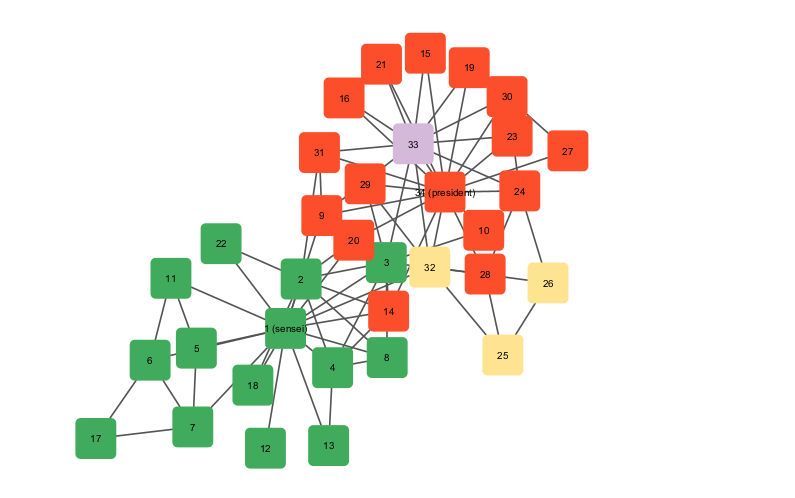

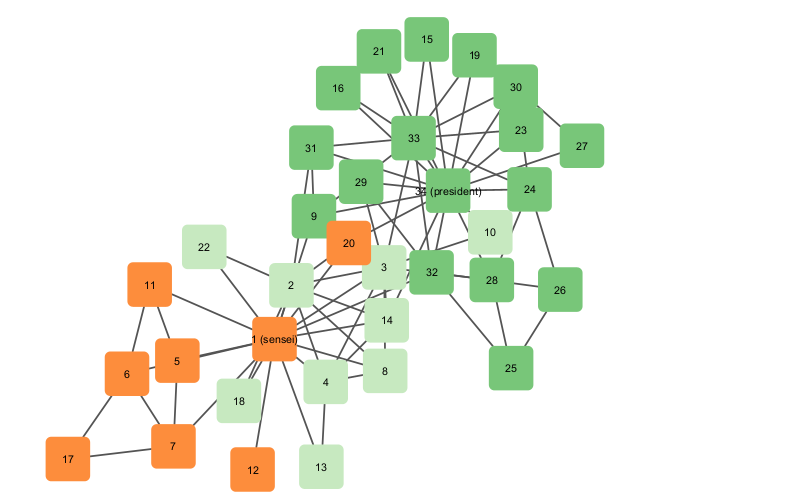

In [10]:
#Leave as is

from IPython.display import Image, display

display(Image(filename='karate_AP.png'))
display(Image(filename='karate_greedy.png'))

<font size="+1" color="red">Replace this cell with a commentary of what do you see in these clusters, their differences and whether they have some relationship with the way in which the Karate Club actually splitted.</font>

<font size="+1" color="red">Replace this cell with what "closeness centrality" and "betweenness centrality" mean, in your own words.</font>

# 1. The flavors bi-partite graph

## 1.0. Examine your input files

Before you begin, we highly recommend you to:

1. Copy the input files to a local directory in your computer
2. Open them in a spreadsheet and look at them

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 1.1. Read the bipartite graph in a dataframe


The following code, which you can leave as-is, reads the ingredient-compound relationship into a dataframe.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [11]:
# Feel free to add imports if you need them

import io
import csv
import pandas as pd
import networkx as nx

from networkx.algorithms import bipartite

import numpy as np
import matplotlib
import scipy

import itertools

from IPython.display import Image

In [12]:
# Leave as is

INPUT_INGR_FILENAME = "data/flavors-network/ingredients.tsv"
INPUT_COMP_FILENAME = "data/flavors-network/compounds.tsv"
INPUT_INGR_COMP_FILENAME = "data/flavors-network/ingredient-compound.tsv"

In [13]:
# Leave this code as-is

ingredients = pd.read_csv(INPUT_INGR_FILENAME, sep="\t")
display(ingredients.head(3))

compounds = pd.read_csv(INPUT_COMP_FILENAME, sep="\t")
display(compounds.head(3))

ingr_comp = pd.read_csv(INPUT_INGR_COMP_FILENAME, sep="\t")
display(ingr_comp.head(3))


,ingredient_id,ingredient_name,ingredient_category
0,0,magnolia_tripetala,flower
1,1,calyptranthes_parriculata,plant
2,2,chamaecyparis_pisifera_oil,plant derivative


,compound_id,compound_name,compound_code
0,0,jasmone,488-10-8
1,1,5-methylhexanoic_acid,628-46-6
2,2,l-glutamine,56-85-9


,ingredient_id,compound_id
0,1392,906
1,1259,861
2,1079,673


## 1.2. Create the flavors bipartite network


Create a new dataframe named `flavors` by joining `ingredients` and `compounds`.

*Tips*:

* To [join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) a DataFrame A and a DataFrame B using a column X, use `result = A.set_index('X').join(B.set_index('X'), how='inner')
* You will need to do two joins to solve this. First, join `ingredients` and `ingr_comp`, then join the result with `compounds`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create the `flavors` dataframe and show its first 10 rows.</font>

In [14]:
result = ingredients.set_index('ingredient_id').join(ingr_comp.set_index('ingredient_id'), how='inner')
result.head(10)

,ingredient_name,ingredient_category,compound_id
ingredient_id,,,
0,magnolia_tripetala,flower,995
1,calyptranthes_parriculata,plant,921
2,chamaecyparis_pisifera_oil,plant derivative,1018
3,mackerel,fish/seafood,272
3,mackerel,fish/seafood,275
3,mackerel,fish/seafood,423
3,mackerel,fish/seafood,424
3,mackerel,fish/seafood,282
3,mackerel,fish/seafood,972


In [15]:
flavors = result.set_index('compound_id').join(compounds.set_index('compound_id'), how='inner')
flavors.head(10)

,ingredient_name,ingredient_category,compound_name,compound_code
compound_id,,,,
995,magnolia_tripetala,flower,diacetyl,431-03-8
921,calyptranthes_parriculata,plant,citral_(neral),5392-40-5
1018,chamaecyparis_pisifera_oil,plant derivative,undecanoic_acid,112-37-8
272,mackerel,fish/seafood,"2,4-nonadienal",6750-03-4
275,mackerel,fish/seafood,lauric_acid,143-07-7
423,mackerel,fish/seafood,vanillin,121-33-5
424,mackerel,fish/seafood,2-pentylfuran,3777-69-3
282,mackerel,fish/seafood,"vanillin,_natural",121-33-5
972,mackerel,fish/seafood,3-octen-2-one,1669-44-9


Drop the `compound_code` column from the resulting dataframe, sort by `ingredient_name` then by `compound_name`, and reset its index.

*Tips:*

* To [drop column](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) x from DataFrame A, you can do: `A = A.drop(columns=['x'])`
* To [sort](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) a DataFrame A by column *x*, then by column *y*, you can do: `A = A.sort_values(['x', 'y'])`
* To [reset the index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) of a DataFrame A, you can do: `A = A.reset_index(drop=True)`; the index is the column appearing in boldface in front of every row of a DataFrame

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [16]:
# Drop, sort, and reset index
flavors = flavors.drop(columns=['compound_code'])
flavors = flavors.sort_values(['ingredient_name', 'compound_name'])
flavors = flavors.reset_index(drop=True)

# Show the first 10 rows
flavors.head(10)


,ingredient_name,ingredient_category,compound_name
0,abies_alba,plant,bornyl_acetate
1,abies_alba_pine_needle,plant,maltol
2,abies_balsamea_oil,plant derivative,myrcene
3,abies_canadensis,plant,bornyl_acetate
4,abies_concolor,plant,bornyl_acetate
5,abies_sibirica,plant,bornyl_acetate
6,abies_sibirica,plant,camphene
7,abies_sibirica,plant,isoborneol
8,acacia,plant,(e)-2-hexenyl_hexanoate
9,acacia,plant,benzyl_acetate


<font size="+1" color="red">Replace this cell with your code to modify the `flavors` dataframe as explained above, and show its first 10 rows.</font>

Write this dataframe to a `flavors.tsv` file, which should be a tab-separated file containing the three fields `ingredient_name`, `ingredient_category` and `compound_name`. Use the function [pandas.DataFrame.to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [18]:
# Save the dataframe to a tab-separated file
flavors.to_csv('flavors.tsv', sep='\t', columns=['ingredient_name', 'ingredient_category', 'compound_name'], index=False)

## 1.3. Open this bi-partite network in Cytoscape


### 1.3.1. Examine the file you generated

Open the ``flavors.tsv`` file in a spreadsheet program to make sure you generated it correctly; it should have exactly 3 tab-separated columns.

### 1.3.2. Import this file in Cytoscape

Remember these files are imported with ``File > Import > Network from File ...``. Then, you have to select:

* ingredient_name as a ``Source Node``
* ingredient_category as a ``Source Node Attribute``.
* compound_name as a ``Target Node``

### 1.3.3. Draw a small part of this graph

Find the `cinnamon` node and everything connected to it at distance 1 or 2. To do this, find "cinnamon" and then click on the "two-houses" (neighbors) icon twice. Extract the selected nodes as a sub-graph by doing `File > New network > From selected nodes, all edges`.

Run the network analyzer and then perform `Layout > Edge weighted spring embedded layout` using edge betweenness.

Style the network so that ingredient nodes have a color that depends on their category, using any color except white, and setting white to be the default node color so that compound nodes remain in color white. Set the label color to black. Set the node shape to ellipse.

Save the image as `flavors_cinnamon.png` and its corresponding lengend as `flavors_cinnamon-legend.gif`.
You can export the legend using the hamburger menu in Style and selecting Create legend ...

Use the next cell to display the network and legend. This time, node labels do not need to be visible or readable, we just want to appreciate overall clusters.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [21]:
# KEEP THIS CELL AS-IS

# Just adjust width/height if necessary

Image(url="flavors_cinnamon.png", width=1200)

In [22]:
Image(url="flavors_cinnamon-legend.gif", width=1200)

### 1.3.4 Compounds in common

*coffee* and *tea* are beloved beberages for their rich, complex flavors, which come from various alkaloid compounds. How many alkaloid compounds do coffee and tea have in common? Based solely on their names, how many of them do you think contribute to their bitterness?


---
*Quick chemestry lesson: you can identify some alkaloid compounds by name, since they tend to finish with "pyrrole", "pyrazine", "quinoline", "Theobromine"*

---

To answer this question, extract the nodes *coffee*, *tea*, and all their compounds in common as a graph.


*   To select the items, simply search both names separated by space in a search bar and select both
*   Then select first neighbours
*   After analyzing the graph, you will see the ones that have a degree of 2. Those are the ones that both networks components have in common.

<font size="+1" color="red">Replace this cell with a brief commentary indicating how many compounds they have in common (*hint: check this in the histogram*), how many of them seem to contain pyrazine (based on their names). Name a couple of those alkaloid-containing compounds.</font>

<font size="+1" color="red">Replace this cell with a brief explanation on why, in this case, the nodes with degree 2 correspond the compounds in common.</font>

# 2. The ingredient-ingredient graph

The bi-partite flavors graph is hard to visualize as it mixes ingredients and compounds. We will now try to visualize only the connections between ingredients.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>


## 2.1. Create an ingredient-ingredient.gml file


First, copy the list of ingredient names into an array `ingredients_array`. To convert column *x* of DataFrame *A* to an array, use `np.asarray(A['x'])`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create `ingredients_array` with the list of ingredients and to print the number of ingredients.</font>

Then, create a dictionary named `ingredient_to_compounds`, in which keys are ingredients, and values are sets of compounds. To create an empty set, you can use `s = set()`. To add to a set, you can do `s.add(element)`. Your code should look like this:

```python
ingredients_array = ...
print("There are %d ingredients" % (len(ingredients_array)))

ingredient_to_compounds = {}

for index, row in flavors.iterrows():
    ...

```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create dictionary `ingredient_to_compounds` with a set of compounds for each ingredient. Print the number of keys of this dictionary. It should be less than or equal to the number of ingredients.</font></font>

Next, we create a NetworkX graph with nodes representing ingredients and edges of weight `x` connecting two ingredients having `x` flavor compounds in common.

To create an empty graph, do `ingredient_ingredient = nx.Graph()`.

Now, iterate through all pairs of ingredients in `ingredients_array` and compute the compounds they have in common between them. To iterate through all pair combinations of an array X, you can use:

```
for u, v in itertools.combinations(X,2):
    ...

```

The size of the intersection of two lists of compounds `l1`, `l2` can be obtained with `len(l1.intersection(l2))`. This will be the weight of the edge connecting two ingredients corresponding to those lists.

Please note you may need to check whether both ingredients have compounds. You can test it by asking `if u in ingredient_to_compounds and v in ingredient_to_compounds`

To facilitate visualization, we will keep only edges connecting two ingredients having **MIN_COMMON_COMPOUNDS or more compounds in common**. Set the value of **MIN_COMMON_COMPOUNDS** so that the resulting graph has somewhere around 150 +/- 30 nodes.

To add to graph *G* an edge between nodes *u* and *v* having weight *w*, do `G.add_edge(u, v, weight=w)`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create the `ingredient_ingredient` graph</font></font>

In [ ]:
# Leave as-is
print("The ingredient-ingredient graph has %d nodes and %d edges" %
      (ingredient_ingredient.number_of_nodes(), ingredient_ingredient.number_of_edges()))

Save the resulting graph into a file. You can use [write_gml](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gml.write_gml.html#networkx.readwrite.gml.write_gml) to use the *GML* format.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
OUTPUT_INGR_INGR_FILENAME = 'ingredient-ingredient.gml'

<font size="+1" color="red">Replace this cell with your code to save graph G to file OUTPUT_INGR_INGR_FILENAME</font>

## 2.2. Work with this file in Cytoscape

## 2.2.1. Inspect this file

*Tip:* Open the ``ingredient-ingredient.gml`` file in a text editor first to see how it is structured.


## 2.2.2. Import this file into Cytoscape

To import this file into Cytoscape:

* `File > Import > Network from file ...`
* Open the `ingredient-ingredient.gml` file

Now we need to import ingredient categories:

* `File > Import > Table from file ...`
* Open the `ingredients.tsv` file
* Import data as "Node Table Columns"
* `ingredient_name`: key
* `ingredient_category`: attribute

Do a `Layout > Edge weighted spring embedded` layout on the *weight* attribute.

### 2.2.3. Style and add simple annotations

Style lines connecting nodes so their thickness and color reflects the number of compounds in common.

Color the nodes with colors representing the ingredient categories. Note that if you right-click on "Mapping type" when creating a discrete mapping, you can use an automatic mapping generator to start with.

Save the main connected component of this graph as `ingr-ingr.png` using `File > Export > Network to image ...`.

Save a legend as `ingr-ingr-legend.gif` using the hamburger menu in `Style`and selecting `Create legend ...`

The next cell should display your graph and its legend.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
# Keep as-is
# Change width if necessary

Image(url="ingr-ingr.png", width=1200)

In [ ]:
# Keep as-is
# Change width if necessary

Image(url="ingr-ingr-legend.gif", width=1200)


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>
